In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
estados = pd.read_csv('estados.csv',sep=";",decimal=",")

In [25]:
estados.head()

,UF,Area_territorial,Matriculas_fundamental,IDH,Receita,Despesas,Rendimento_domiciliar_percapita,Veiculos
0,Acre,164123.96,157646.0,0.66,6632883.11,6084416.81,890.0,277831.0
1,Alagoas,27843.30,490587.0,0.63,11950438.46,10460634.92,731.0,834827.0
2,Amapá,142470.76,136185.0,0.71,5396417.15,4224464.09,880.0,195039.0
3,Amazonas,1559167.89,705007.0,0.67,17328459.43,15324896.56,842.0,883083.0
4,Bahia,564760.43,2034711.0,0.66,50191003.24,45570160.00,913.0,4139107.0


In [59]:
estados[['Area_territorial','Matriculas_fundamental',
         'IDH','Receita','Despesas','Rendimento_domiciliar_percapita','Veiculos']].corr('spearman')

,Area_territorial,Matriculas_fundamental,IDH,Receita,Despesas,Rendimento_domiciliar_percapita,Veiculos
Area_territorial,1.000000,0.274115,-0.134660,0.230159,0.216117,-0.184371,0.191697
Matriculas_fundamental,0.274115,1.000000,0.130681,0.908425,0.910256,0.166056,0.873626
IDH,-0.134660,0.130681,1.000000,0.478043,0.449275,0.940172,0.513850
Receita,0.230159,0.908425,0.478043,1.000000,0.990232,0.506716,0.974969
Despesas,0.216117,0.910256,0.449275,0.990232,1.000000,0.481685,0.959707
Rendimento_domiciliar_percapita,-0.184371,0.166056,0.940172,0.506716,0.481685,1.000000,0.564103
Veiculos,0.191697,0.873626,0.513850,0.974969,0.959707,0.564103,1.000000


In [72]:
Estados = estados.loc[:,estados.columns =='UF']
Estados.head()

,UF
0,Acre
1,Alagoas
2,Amapá
3,Amazonas
4,Bahia


In [68]:
#Separar variáveis quantitativas e normalizá-las
Variaveis = estados.loc[:, estados.columns != 'UF']
Variaveis = StandardScaler().fit_transform(Variaveis)
Variaveis_2 = estados.loc[:, estados.columns != 'UF']

In [62]:
#Executar o PCA com 02 componentes
pca = PCA(n_components=2)
pca.fit(Variaveis)
N_Variaveis = pca.fit_transform(Variaveis)

In [75]:
#Variância total (%) compartilhada pelas variáveis originais para formar o fator 1 e 2, respectivamente
#Somando ambas, usar 02 componentes contém 86,7% da variância das variáveis originais, ou seja, perdemos 13,3% da variância
print((pca.explained_variance_ratio_)*100)

[64.15569084 22.55807542]


In [64]:
# Score dos fatores: parâmetro que relaciona cada variável com o fator calculado
loading_scores = pd.Series(pca.components_[0],index=Variaveis_2.columns) #selecionando Fator 1

In [65]:
loading_scores
#Observa-se que Receita, Veiculos e Despesa sao as variáveis que mais influenciam no calculo do Fator 1
# Area territorial praticamente não agrega ao calculo do fator 1

Area_territorial                  -0.026189
Matriculas_fundamental             0.429014
IDH                                0.302676
Receita                            0.460889
Despesas                           0.457665
Rendimento_domiciliar_percapita    0.302721
Veiculos                           0.458401
dtype: float64

In [66]:
loading_scores = pd.Series(pca.components_[1],index=Variaveis_2.columns)
loading_scores
# Para o fator 2, Rendimento domiciliar, IDH e Area Territorial sao os mais significativos para sua formaçao

Area_territorial                  -0.479316
Matriculas_fundamental            -0.298206
IDH                                0.545112
Receita                           -0.156847
Despesas                          -0.173451
Rendimento_domiciliar_percapita    0.555595
Veiculos                          -0.144259
dtype: float64

In [50]:
N_Variaveis = pd.DataFrame(N_Variaveis, columns=['var1','var2'])

In [51]:
df = pd.concat([Variaveis_2, N_Variaveis], axis=1, ignore_index=False)

In [52]:
#Calculo das cargas fatoriais
df.corr('spearman')

,Area_territorial,Matriculas_fundamental,IDH,Receita,Despesas,Rendimento_domiciliar_percapita,Veiculos,var1,var2
Area_territorial,1.000000,0.274115,-0.134660,0.230159,0.216117,-0.184371,0.191697,0.121490,-0.471917
Matriculas_fundamental,0.274115,1.000000,0.130681,0.908425,0.910256,0.166056,0.873626,0.693529,-0.359585
IDH,-0.134660,0.130681,1.000000,0.478043,0.449275,0.940172,0.513850,0.747669,0.699926
Receita,0.230159,0.908425,0.478043,1.000000,0.990232,0.506716,0.974969,0.904762,-0.050061
Despesas,0.216117,0.910256,0.449275,0.990232,1.000000,0.481685,0.959707,0.887057,-0.079976
Rendimento_domiciliar_percapita,-0.184371,0.166056,0.940172,0.506716,0.481685,1.000000,0.564103,0.778388,0.683150
Veiculos,0.191697,0.873626,0.513850,0.974969,0.959707,0.564103,1.000000,0.910867,0.028083
var1,0.121490,0.693529,0.747669,0.904762,0.887057,0.778388,0.910867,1.000000,0.260073
var2,-0.471917,-0.359585,0.699926,-0.050061,-0.079976,0.683150,0.028083,0.260073,1.000000


In [35]:
df2 = pd.concat([Estados, N_Variaveis], axis=1, ignore_index=False)

In [36]:
df2

,UF,var1,var2
0,Acre,-1.688738,-0.198464
1,Alagoas,-1.692806,-0.695416
2,Amapá,-1.424003,0.407761
3,Amazonas,-1.281389,-2.200366
4,Bahia,0.219435,-1.624024
5,Ceará,-0.460822,-0.402517
6,Distrito Federal,1.049596,3.743424
7,Espírito Santo,-0.301142,1.347922
8,Goiás,0.166511,0.504185
9,Maranhão,-1.223508,-1.353491


Text(0, 0.5, 'Cumulative explained variance')

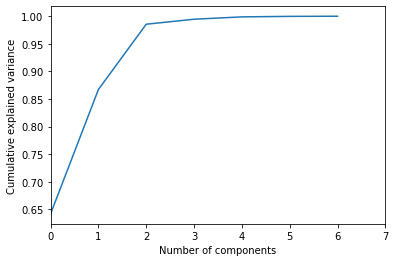

In [37]:
pca = PCA().fit(Variaveis)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')